# Chapter 12 물리계 최적화하기

## 12.1 포물선 운동 시뮬레이션 테스트하기

### 12.1.1 오일러 방법으로 시뮬레이션 만들기

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi
import warnings
warnings.filterwarnings('ignore')

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [2]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [3]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

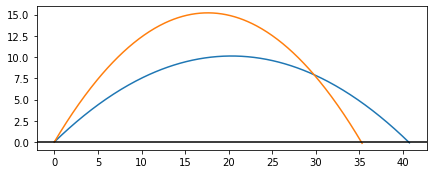

In [4]:
plot_trajectories( 
    trajectory(45),
    trajectory(60))

### 12.1.2 궤적의 특성 측정하기

In [5]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1] #<1>

def max_height(traj):
    return max(traj[2])

### 12.1.3 서로 다른 발사각 살펴보기

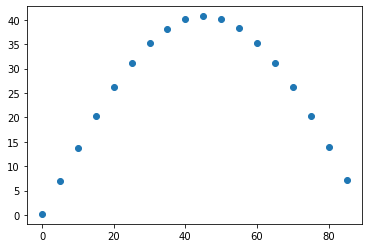

In [6]:
angles = range(0,90,5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

### 12.1.4 연습문제

### 연습문제 12.1
초기 높이 $0$에서 $50^\circ$ 각도로 대포를 발사했을 때, 대포의 도달거리를 구하라. 발사각도가 $130^\circ$일 때 발사할 경우 대포의 도달거리를 구하라.

In [7]:
landing_position(trajectory(50))

40.10994684444007

In [8]:
landing_position(trajectory(130))

-40.10994684444007

### 연습문제 12.2 (Mini-project)
1초가 지날 때마다 궤적 그래프에 큰 점을 그리도록 `plot_trahectories` 함수를 개선하라. 이를 통해 플롯에서 시간이 얼마나 흘렀는지 관찰할 수 있다.

See implementation above

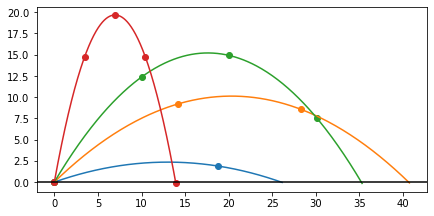

In [9]:
plot_trajectories(
    trajectory(20), 
    trajectory(45),
    trajectory(60),
    trajectory(80), 
    show_seconds=True)

### 연습문제 12.3
각이 $0^\circ$와 $180^\circ$ 사이일 때 발사 각도 대 체공 시간에 대한 산점도를 그려라. 체공 시간이 최대가 되는 발사 각도를 구하라.

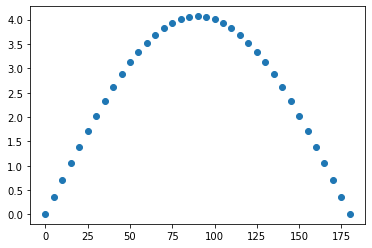

In [10]:
test_angles = range(0,181,5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

### 연습문제 12.4 (Mini-project)
주어진 $\theta$값 집합에 대해 임의의 척도를 계산할 결과를 플로팅해주는 함수 `plot_trajectory_metric`을 작성하라. 예를 들어 다음 함수는 발사 각도가 $10^\circ, 20^\circ, 30^\circ$일 때 탄착점 대 발사각도의 산점도를 만들어낸다. <br>
`plot_trajectory_metric(landing_position,[10,20,30])`<br>
추가로 `plot_trajectory_metric`에서 받은 키워드 인자를 함수 내부에서 `trajectory` 함수를 호출할 때 전달하도록 만들어라. 이렇게 하면 다른 시뮬레이션 매개변수로 테스트를 재실행할 수 있기 때문이다. 예를 들어 다음 코드는 같은 종류의 플롯을 그리지만 초기 발사 높이가 10m인 시뮬레이션을 플로팅한다.<br>
`plot_trajectory_metric(landing_position,[10,20,30], height=10)`

In [11]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,[metric(trajectory(theta,**settings)) for theta in thetas])

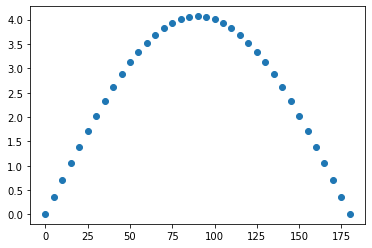

In [12]:
plot_trajectory_metric(hang_time, range(0,181,5))

### 연습문제 12.5 (Mini-project)
초기 발사 높이가 10m일 때 포탄의 사거리가 가장 커지는 발사 각도의 근삿값을 구하라.

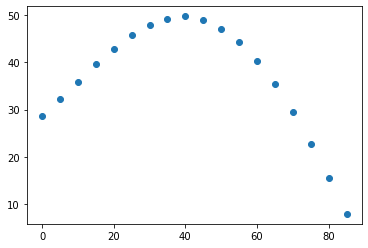

In [13]:
plot_trajectory_metric(landing_position,range(0,90,5), height=10)

## 12.2 최적 사거리 계산하기

### 12.2.1 발사각의 함수로 발사체의 사거리 구하기

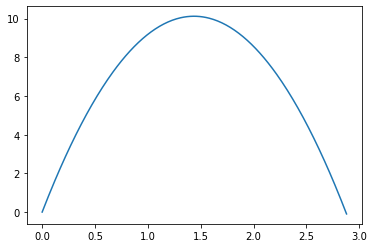

In [14]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts,zs)

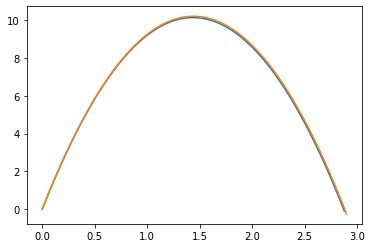

In [15]:
def z(t): #<1>
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

plt.plot(ts,zs)
plot_function(z,0,2.9)

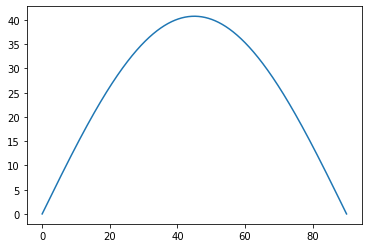

In [16]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

### 12.2.2 최대 사거리 구하기

In [17]:
r(45)

40.774719673802245

In [18]:
r(135)

-40.77471967380224

### 12.2.4 연습문제

### 연습문제 12.6
발사 각도 $\theta$에 대한 결과 시간 식 $\Delta t$를 사용해 포탄의 체공 시간을 최대화하는 각도를 구하라.

#### 포탄의 초기 속도가 $v = |V|$일 때, 체공 시간은 $t=2v_z/g=2v\sin(\theta)/g$이다. 이 식은 $\sin(\theta)$가 최대일 때 최대화된다. 미적분을 쓸 필요는 없다. $0 \leq \theta \leq 180^\circ$에서 $\sin(\theta)$의 최댓값은 $\theta = 90^\circ$에서 구하기 때문이다. 다른 매개변수가 모두 일정하면 포탄은 바로 위를 향해 발사할 때 가장 오랫동안 공중에 머물러 있다.

### 연습문제 12.7
$\sin(x)$의 도함수가 $x = 11\pi/2$에서 $0$인지 확인하라. 이 점에서 $\sin(x)$는 최댓값을 갖는지 최솟값을 갖는지 판정하라.

#### $\sin(x)$의 도함수는 $\cos(x)$이며 다음이 성립한다.
$$ \cos \left( \frac{11\pi}{2} \right) = \cos \left( \frac{3\pi}{2} + 4\pi \right) = \cos \left( \frac{3\pi}{2} \right) = 0 $$
#### 따라서 $\sin(x)$의 도함수는 $x = 11\pi/2$에서 $0$이다. $\sin(11\pi/2) = \sin(3\pi/2) = -1$이고 사인함수의 범위는 $-1$과 $1$ 사이이기 때문에 이것이 국소 최솟값임을 확인할 수 있다.

### 연습문제 12.8
$f(x) = x^3 -x$가 극댓값과 극솟값을 갖는 점을 구하라. 해당 점에서 함숫값을 구하라.

#### 어떤 양수 $x$에서 극솟값을 가지고 어떤 음수 $x$에서 극댓값을 가지는 함수 $f(x)$를 플로팅하여 볼 수 있다.
#### 도함수는 $f^\prime(x) = 3x^2-1$이므로 $3x^2-1=0$인 $x$를 구해야 한다. 근의 공식이 필요 없을 정도로 풀이는 간단하다. $3x^2-1=0$이면 $x^2=1/3$이므로 $x=-1/\sqrt{3}$ 또는 $x=1/\sqrt{3}$이다. 이 $x$값들은 $f(x)$가 극댓값 및 극솟값을 갖는다.
#### 극댓값은 $f\left( \frac{-1}{\sqrt{3}} \right) = \frac{-1}{3\sqrt{3}} - \frac{-1}{\sqrt{3}} = \frac{2}{3\sqrt{3}}$이고,
#### 극솟값은 $f\left( \frac{1}{\sqrt{3}} \right) = \frac{1}{3\sqrt{3}} - \frac{1}{\sqrt{3}} = \frac{-2}{3\sqrt{3}}$이다.

### 연습문제 12.9 (Mini-project)
이차함수 $q(x) = ax^2 + bx + c\, (a\neq0)$의 그래프는 **포물선**(parabola)으로 하나의 최댓값 또는 하나의 최솟값을 갖는 아치(arch) 모양이다. 수 $a,b,c$를 사용해 $q(x)$가 최대 또는 최소가 되는 $x$값을 구하라. 이 점이 언제 최대 또는 최소가 되는지 설명하라.

#### 이 이차함수의 도함수는 $q^\prime(x) = 2ax + b$이다. $x = -b/2a$일 때 도함수의 값은 $0$이다.
#### $a$가 양수일 때, 매우 작은 $x$값에서 도함수가 음수인데, $x$값이 증가하면서 $x = -b/2a$에서 도함수는 $0$이고 그 이후로는 도함수가 양수이다. 이는 $q$가 $x = -ba/2a$보다 작을 때는 감소하며 $x = -b/2a$보다 클 때에는 증가함을 의미한다. 즉, $x = -b/2a$일 때 $q(x)$가 최솟값을 가진다.
#### $a$가 음수이면 정반대이다. 결론적으로 $a$가 양수이면 $x = -b/2a$에서 $q(x)$가 최솟값을 가지고 $a$가 음수이면 $x = -b/2a$에서 $q(x)$가 최댓값을 가진다.

## 12.3 시뮬레이션 개선하기

### 12.3.1 다른 차원 추가하기

In [19]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [20]:
def flat_ground(x,y):
    return 0
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

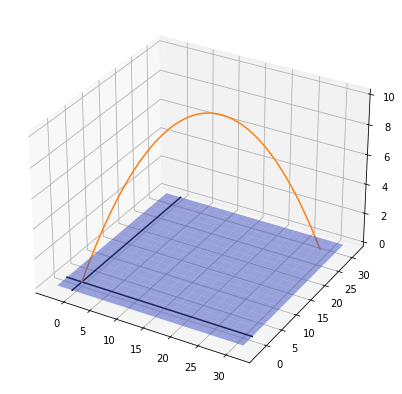

In [21]:
plot_trajectories_3d(trajectory3d(45,45))

### 12.3.2 대포 주변의 지형 모델링하기

In [22]:
def flat_ground(x,y):
    return 0

In [23]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [24]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [25]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

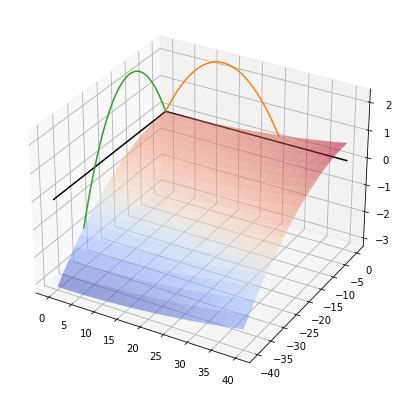

In [26]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

### 12.3.3 3차원에서 사거리 수식 구하기

In [27]:
from math import sqrt

B = 0.001 #<1>
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): #<2>
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi): #<3>
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) #<4>
    a = (g/2) - B * vx**2 + C * vy**2 #<5>
    b = vz
    landing_time = -b/a #<6>
    landing_distance = v_xy * landing_time #<7>
    return landing_distance

### 12.3.4 연습문제

### 연습문제 12.10
$|V| = v$가 포탄의 초기 속도라고 할 때, 초기 속도벡터의 크기가 $v$와 같은지 확인하라. 즉, 벡터 $(v\cos\theta\cos\phi, v\cos\theta\sin\phi, v\sin\theta)$의 길이가 $v$임을 나타내라.

#### $(v\cos\theta\cos\phi, v\cos\theta\sin\phi, v\sin\theta)$의 크기는 다음과 같다.
$$ \sqrt{v^2\cos^2\theta\cos^2\phi + v^2\cos^2\theta\sin^2\phi + v^2\sin^2\theta} = \sqrt{v^2(\cos^2\theta\cos^2\phi + \cos^2\theta\sin^2\phi + \sin^2\theta)} $$
$$ = \sqrt{v^2(\cos^2\theta(\cos^2\phi + \sin^2\phi) + \sin^2\theta} $$
$$ = \sqrt{v^2(\cos^2\theta \cdot 1 + \sin^2\theta)} $$
$$ = \sqrt{v^2 \cdot 1} $$
$$ = v $$

### 연습문제 12.11
고도가 $Bx^2 - Cy^2$인 능선에서 포탄의 사거리를 $\theta$과 $\phi$의 함수로 명시적으로 나타내라. 이 식에 등작하는 상수에는 $B, C$ 외에도 초기 발사 속도 $v$와 중력가속도 $g$가 있다.

#### 다음 식에서부터 시작해보자.
$$ d = \frac{-v_2 \cdot v_xy}{\frac{g}{2} - Bv_x^2 + Cv_y^2} $$
#### $v_z = v\sin\theta, v_xy = v\cos\theta, v_y = v\cos\theta\sin\phi, v_x = v\cos\theta\cos\phi$를 대입하면
$$ d(\theta,\phi) = \frac{-v^2\sin\theta\cos\theta}{\frac{g}{2} - Bv^2\cos^2\theta\cos^2\phi + Cv^2\cos^2\theta\sin^2\phi} $$
#### 분모를 약간 정리하면 다음과 같다.
$$ d(\theta,\phi) = \frac{-v^2\sin\theta\cos\theta}{\frac{g}{2}+v^2\cos^2\theta \cdot (C\sin^2\phi - B\cos^2\phi)} $$

### 연습문제 12.12 (Mini-project)
포탄과 같은 객체가 공중에서 빠르게 움직이면 **항력**(drag force)이라 하는 공기로 인한 마찰력을 경험한다. 항력은 객체를 이동 방향과 반대로 밀어낸다. 항력은 포탄의 크기나 모양, 공기의 밀도 등 다양한 요인에 의해 결정되지만 상황을 단순하게 만들기 위해 다음과 같이 작용한다고 가정하자. $v$가 임의의 점에서 포탄의 속도벡터라면 항력 $F_d$는 다음과 같다.
$$ F_d = -\alpha v $$<br>
여기서 $\alpha$(alpha, 알파)는 공중에서 특정 객체가 받는 항력의 세기를 나타낸다. 항력은 속도에 비례하는데, 이는 객체가 속도를 올리면 더많은 항력을 받음을 의미한다. 포탄 시뮬레이션에서 항력에 관한 매개변수 **drag**를 어떻게 삽입할지를 정해서 항력이 포탄을 느리게 만듦을 보여라.

In [28]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground,drag=0):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vx -= (drag * vx) * dt
        vy -= (drag * vy) * dt
        vz += (g - (drag * vz)) * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

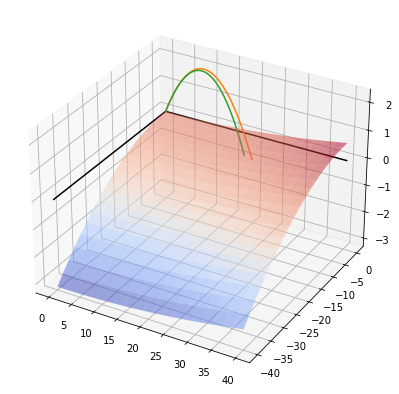

In [29]:
plot_trajectories_3d(
    trajectory3d(20,-20,elevation=ridge),
    trajectory3d(20,-20,elevation=ridge,drag=0.1),
    bounds=[0,40,-40,0],
    elevation=ridge)

## 12.4 경사상승법으로 사거리 최적화하기

### 12.4.1 발사 매개변수 대비 사거리 플로팅하기

In [30]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 504x504 with 0 Axes>

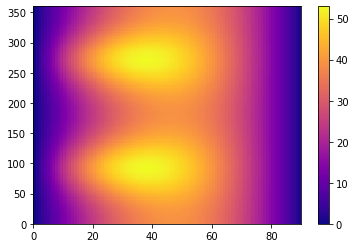

In [31]:
scalar_field_heatmap(landing_distance,0,90,0,360)

### 12.4.2 사거리 함수의 그라디언트

In [32]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

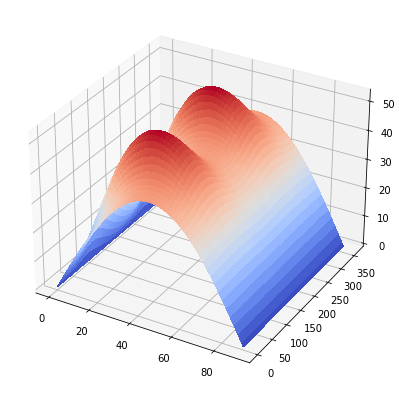

In [33]:
plot_scalar_field(landing_distance,0,90,0,360)

### 12.4.3 그라디언트로 오르막 방향 구하기

In [34]:
def secant_slope(f,xmin,xmax): #<1>
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6): #<2>
    return secant_slope(f,x-dx,x+dx)

In [35]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y), y0, dx=dx)
    return (partial_x,partial_y)

In [36]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

Feel free to ignore the following code, which just supports the graphic of overlaying a vector field on a heatmap.

<Figure size 504x504 with 0 Axes>

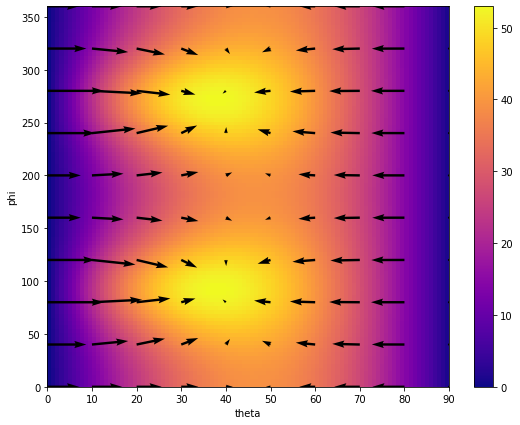

In [37]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 504x504 with 0 Axes>

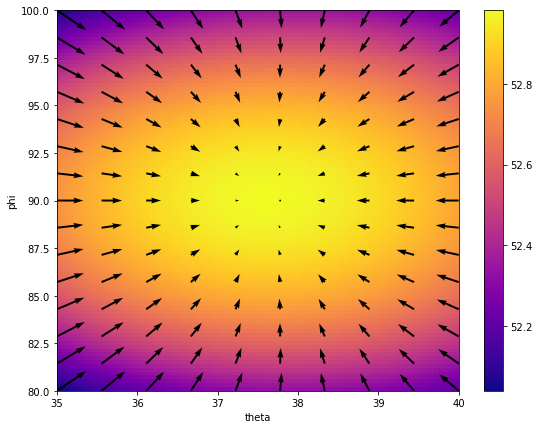

In [38]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

### 12.4.4 경사상승법 구현하기

In [39]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [40]:
gradient_ascent(landing_distance,36,83)

(37.58114751557887, 89.99992616039857)

In [41]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [42]:
gradient_ascent_points(landing_distance,36,83)

([36,
  36.122600166772905,
  36.23613677117784,
  36.34128767809185,
  36.43867738707969,
  36.528881661579746,
  36.612431593208484,
  36.689817410269534,
  36.76149182796271,
  36.82787319253559,
  36.889348238189385,
  36.94627463082189,
  36.998983312818545,
  37.04778060625894,
  37.09295017401476,
  37.1347547357105,
  37.17343773749891,
  37.20922482998986,
  37.24232519341257,
  37.27293280238169,
  37.30122755921293,
  37.32737638815892,
  37.35153417332558,
  37.373844629087024,
  37.394441177605785,
  37.41344766648102,
  37.43097908994937,
  37.44714219995173,
  37.46203614206898,
  37.47575300263992,
  37.48837829193029,
  37.49999144506543,
  37.51066624835594,
  37.520471237201555,
  37.529470054915286,
  37.537721861285455,
  37.545281588371104,
  37.55220026024622,
  37.5585252985331,
  37.5643007355652,
  37.56956745597163,
  37.57436347378886,
  37.57872406035837,
  37.58268198235851,
  37.58626769365101,
  37.58950943120426,
  37.59243345312513,
  37.59506413458223

<Figure size 504x504 with 0 Axes>

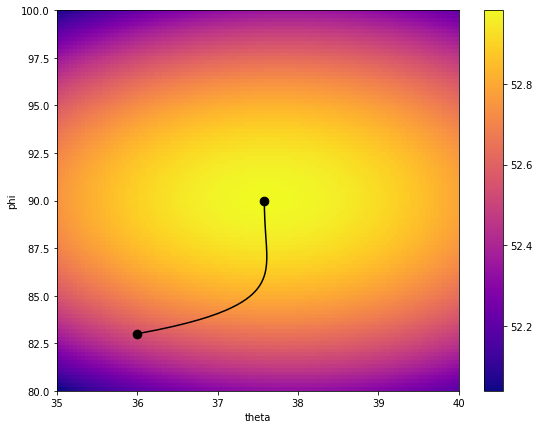

In [43]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [44]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

### 12.4.5 연습문제

### 연습문제 12.13
히트맵에서 점 20개를 무작위로 선택한 뒤 경사상승법 경로를 동시에 플로팅하라. 모든 경로는 두 개의 최대점 중 하나에서 끝나야 한다.

<Figure size 504x504 with 0 Axes>

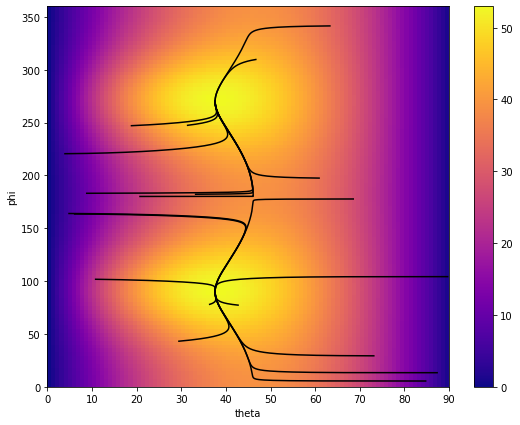

In [45]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('theta')
plt.ylabel('phi')
gap = gradient_ascent_points(landing_distance,60,190,1000)

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)

### 연습문제 12.15
$r(\theta,\phi)$의 그라디언트가 0이지만 함수가 최대화되지 않는 $r(\theta,\phi)$ 위의 점을 구하라.

In [46]:
gradient_ascent(landing_distance,0,180)

(46.122613357930206, 180.0)

### 연습문제 12.16
경사상승법으로 $(36,83)$에서 원점에 도달할 때까지 몇 번의 단계가 필요한지 답하라. 그라디언트 값을 그대로 더해 다음 점으로 이동하지 말고, 그라디언트의 1.5배를 더할 때 더 적은 단계로 도달함을 보여라. 각 단계에서 더 멀리 이동하면 어떤 일이 벌어지는지 설명하라.

In [47]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += rate * grad[0]
        y += rate * grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [48]:
def count_ascent_steps(f,x,y,rate=1):
    gap = gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])

In [49]:
count_ascent_steps(landing_distance,36,83)

37.58114751557887 89.99992616039857


855

In [50]:
count_ascent_steps(landing_distance,36,83,rate=1.5)

37.58114755288237 89.99992556887184


568

In [51]:
count_ascent_steps(landing_distance,36,83,rate=3)

37.58114749426255 89.99992676791281


282

In [52]:
count_ascent_steps(landing_distance,36,83,rate=10)

37.58114748360439 89.99992495958149


81

In [53]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.58114744807723 89.99992670041118


38

<Figure size 504x504 with 0 Axes>

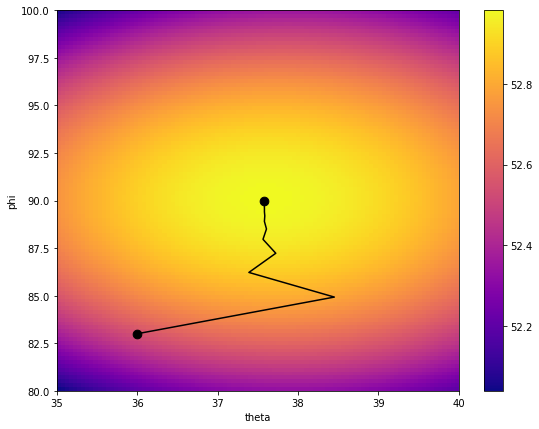

In [54]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=20),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

### 연습문제 12.17
$r$을 $\theta$와 $\phi$의 함수로 보고 시뮬레이션한 결과를 직접 사용해 `gradient_ascent`를 실행하면 벌어지는 일을 설명하라.

In [55]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

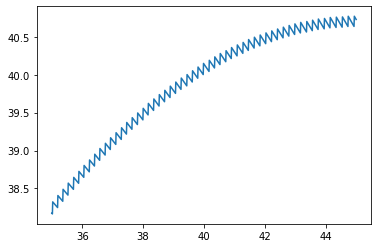

In [56]:
plot_function(simulated_distance_270,35,45)